# Example Prophet Model

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [1]:
import pandas as pd
import os
import numpy as np
import pystan
import fbprophet
from fbprophet import Prophet

In [2]:
# fbprophet v0.7.1
# numpy v1.19.1
# pandas v1.1.2
# pystan v2.19.1.1
print(fbprophet.__version__)
print(np.__version__)
print(pd.__version__)
print(pystan.__version__)

0.7.1
1.19.2
1.2.3
2.19.1.1


In [3]:
data_processed_location = '../data/processed'

if 'processed' not in os.getcwd():
    os.chdir(data_processed_location)
    
# sample dataset
df = pd.read_hdf('pc4_verbruiksdata_per_dag_5211.h5').reset_index()


INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
df.rename(columns={"DATUM": "ds", "VERBRUIK": "y"}, inplace=True)

In [5]:
df.head()

,ds,y
0,2010-01-01,137.348759
1,2010-01-02,153.806423
2,2010-01-03,138.611600
3,2010-01-04,152.291028
4,2010-01-05,154.200426


In [6]:
# We fit the model by instantiating a new Prophet object.
# Any settings to the forecasting procedure are passed into the constructor. 
# Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
#Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
# You can get a suitable dataframe that extends into the future a specified number of days using the helper method 
# Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model 
# fit as well.
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4743,2022-12-27
4744,2022-12-28
4745,2022-12-29
4746,2022-12-30
4747,2022-12-31


In [8]:
# The predict method will assign each row in future a predicted value which it names yhat.
# If you pass in historical dates, it will provide an in-sample fit. 
# The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns 
# for components and uncertainty intervals.
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
4743,2022-12-27,141.394095,134.556808,147.436341
4744,2022-12-28,142.045982,135.046295,148.751842
4745,2022-12-29,142.036627,135.589395,148.509807
4746,2022-12-30,140.635781,133.776684,147.475413
4747,2022-12-31,134.680257,128.305704,140.944537


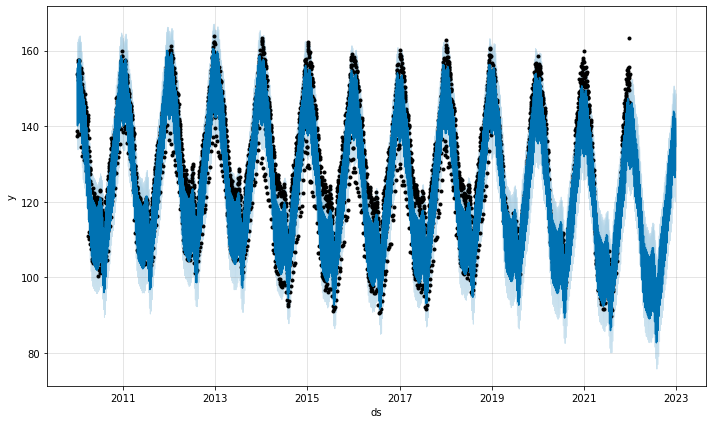

In [9]:
# You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.
fig1 = m.plot(forecast)

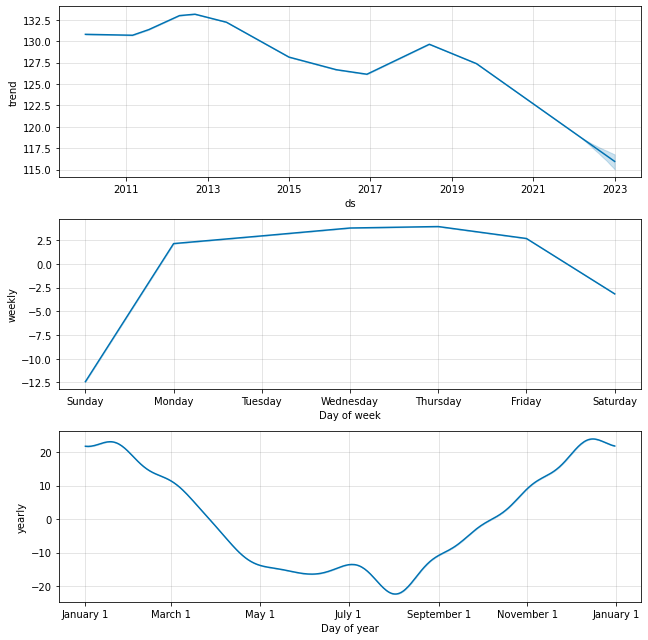

In [10]:
# If you want to see the forecast components, you can use the Prophet.plot_components method. 
# By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
# If you include holidays, you’ll see those here, too.
fig2 = m.plot_components(forecast)


In [11]:
# An interactive figure of the forecast and components can be created with plotly. 
# You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. 
# You will also need to install the notebook and ipywidgets packages.
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)